In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/content/Synthetic_Financial_datasets_log.csv')

In [12]:
df.shape

(6362620, 11)

In [13]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [15]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [16]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [17]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [18]:
df.nunique()

,0
step,743
type,5
amount,5316900
nameOrig,6353307
oldbalanceOrg,1845844
newbalanceOrig,2682586
nameDest,2722362
oldbalanceDest,3614697
newbalanceDest,3555499
isFraud,2


In [19]:
df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [20]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder ()
df['type'] = le.fit_transform(df['type'])

In [22]:
df.groupby('type')['isFraud'].value_counts()

type  isFraud
0     0          1399284
1     0          2233384
      1             4116
2     0            41432
3     0          2151495
4     0           528812
      1             4097
Name: count, dtype: int64

In [23]:
df['changebalanceOrg']=df['oldbalanceOrg']-df['newbalanceOrig']
df['changebalanceDest']=df['oldbalanceDest']-df['newbalanceDest']

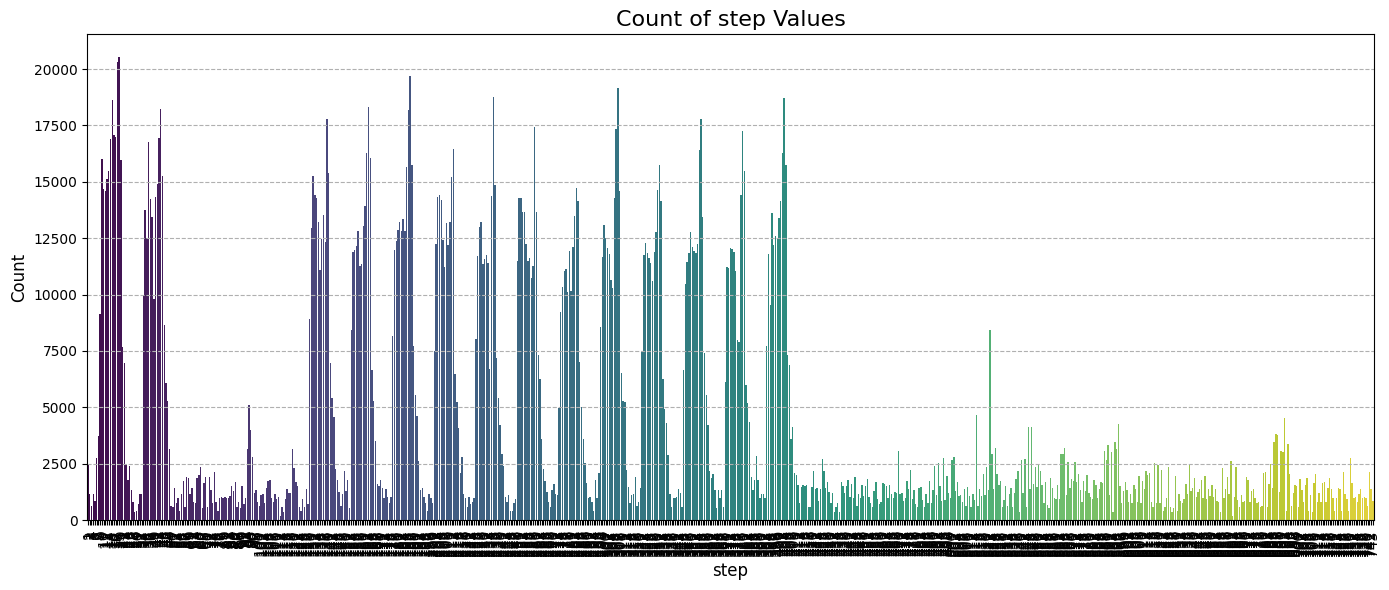

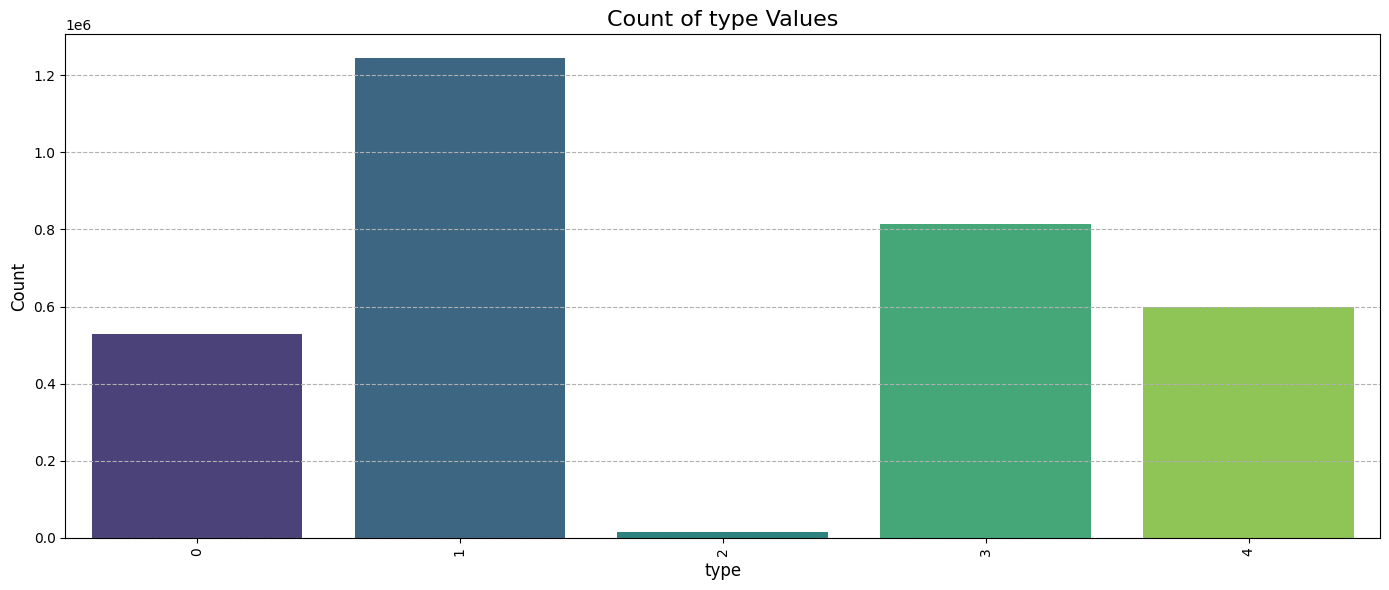

In [45]:
warnings.filterwarnings('ignore')

# Assuming df is already defined
# Example: df = pd.read_csv('your_dataset.csv')

def count_plot(feature):
    plt.figure(figsize=(14, 6))
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.xticks(rotation=90)
    plt.title(f'Count of {feature} Values', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()
    print("\n")

# List of columns to plot
columns = ['step', 'type']

# Generate count plots for each column
for feature in columns:
    count_plot(feature)

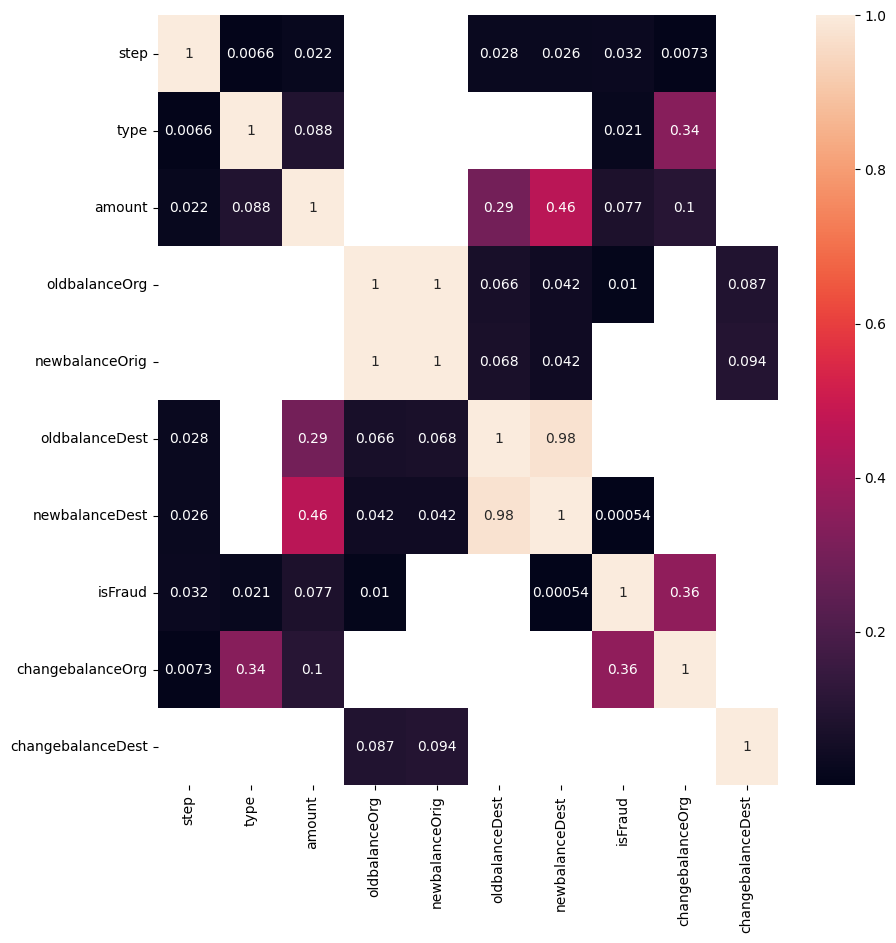

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr()[df.corr()>0], annot=True)
plt.show( )

In [26]:
df1= df[['step','type','amount','oldbalanceOrg','newbalanceDest','changebalanceOrg','isFraud']]
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceDest,changebalanceOrg,isFraud
0,1,3,9839.64,170136.0,0.0,9839.64,0
1,1,3,1864.28,21249.0,0.0,1864.28,0
2,1,4,181.00,181.0,0.0,181.00,1
3,1,1,181.00,181.0,0.0,181.00,1
4,1,3,11668.14,41554.0,0.0,11668.14,0


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   step              int64  
 1   type              int64  
 2   amount            float64
 3   oldbalanceOrg     float64
 4   newbalanceDest    float64
 5   changebalanceOrg  float64
 6   isFraud           int64  
dtypes: float64(4), int64(3)
memory usage: 339.8 MB


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


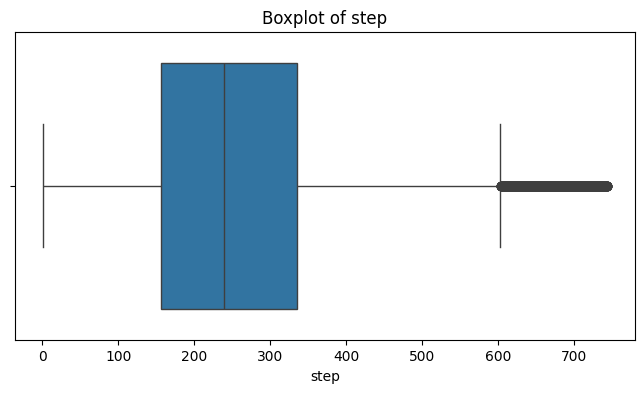

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


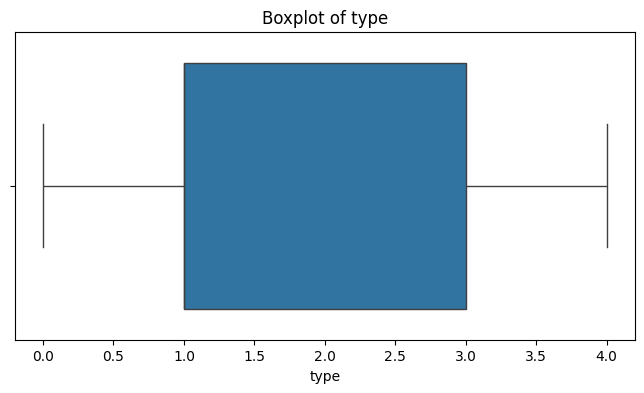

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


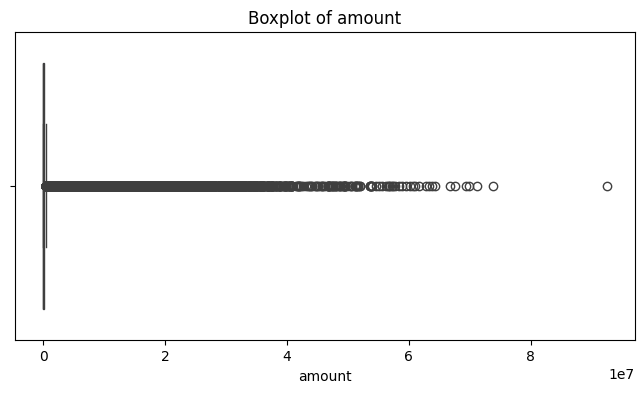

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


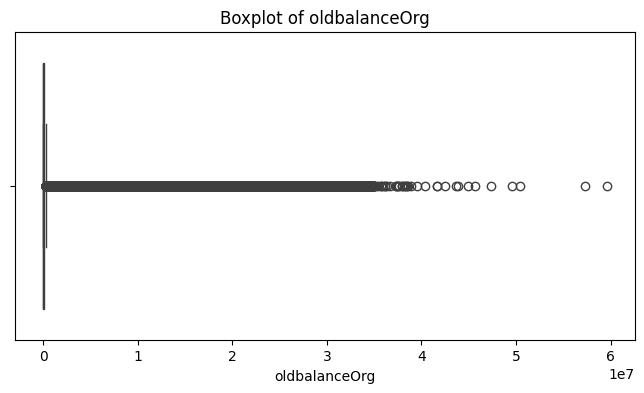

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


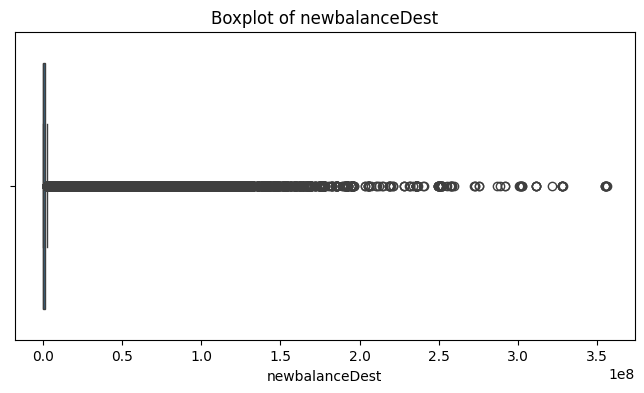

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


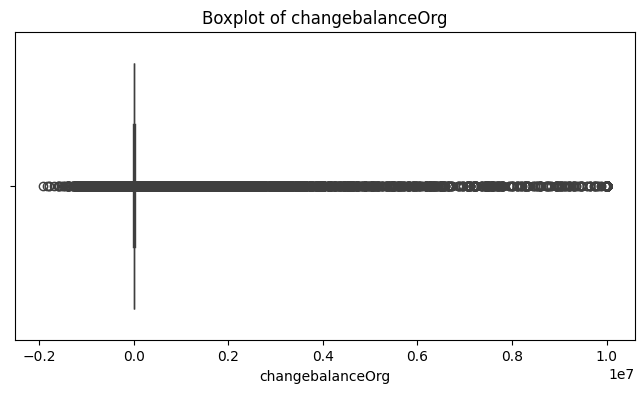

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


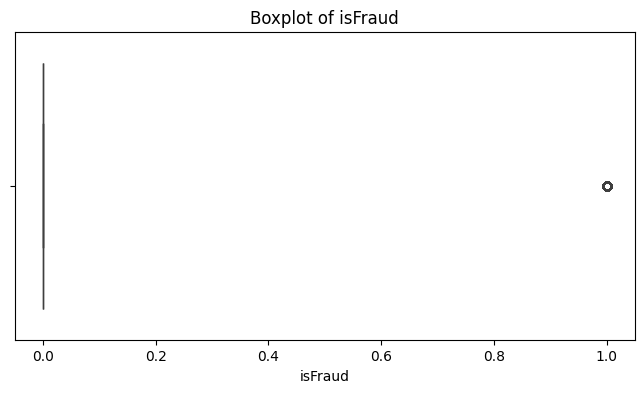

In [28]:
for column in df1.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

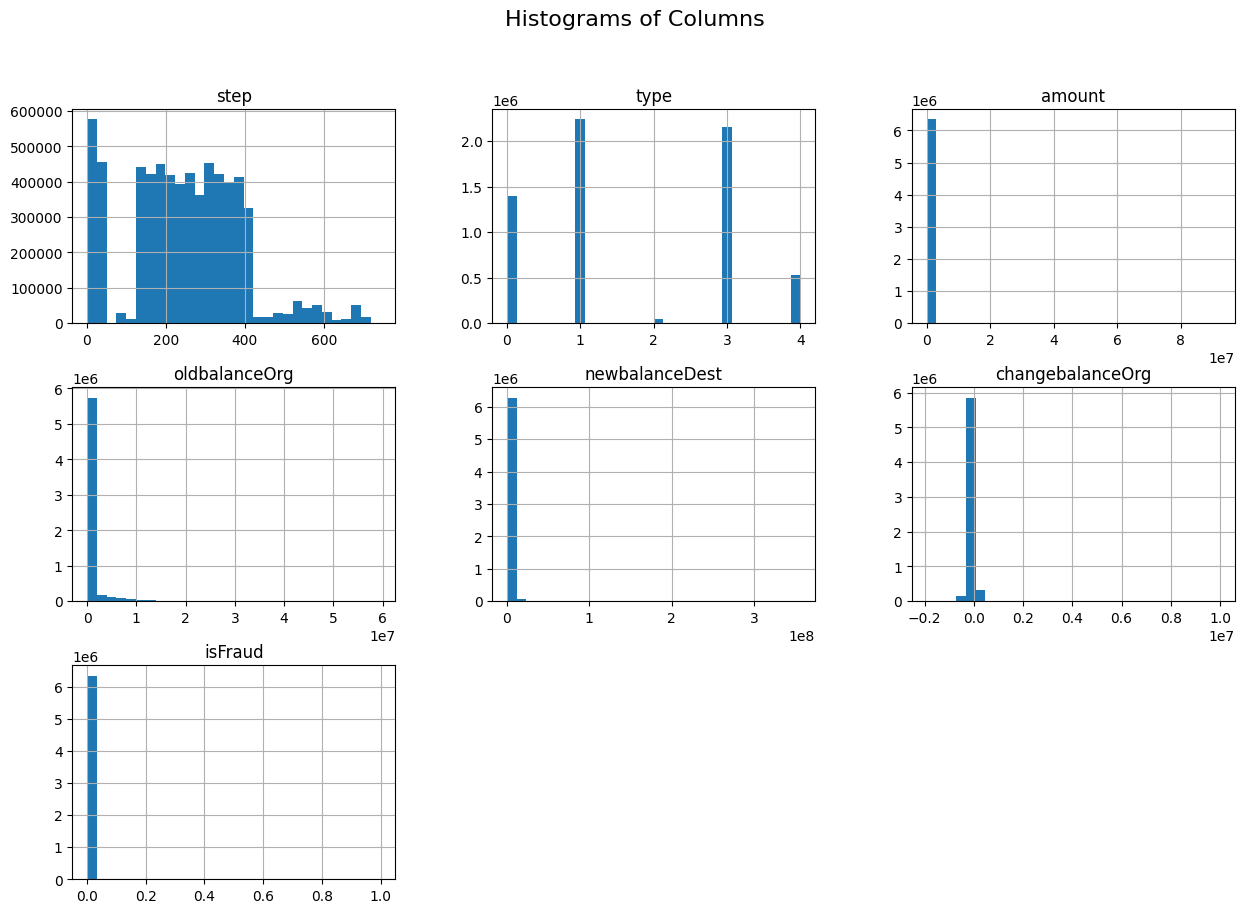

In [29]:
df1.hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Columns', fontsize=16)
plt.show()

In [30]:
df1.skew()

,0
step,0.375177
type,0.196530
amount,30.993949
oldbalanceOrg,5.249136
newbalanceDest,19.352302
changebalanceOrg,24.630520
isFraud,27.779538


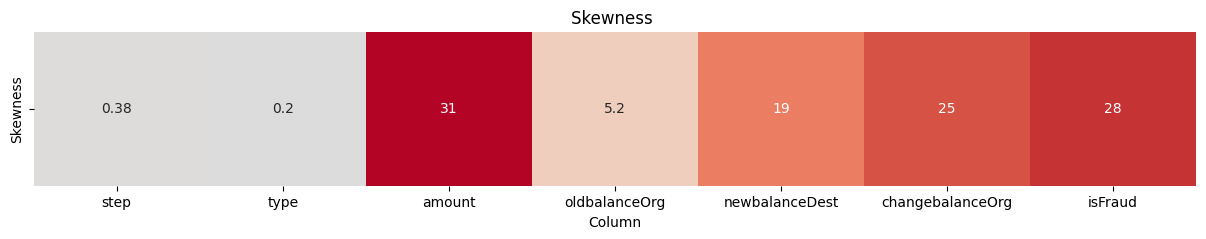

In [31]:
skewness = df1.skew()
skewness_df = skewness.to_frame(name='Skewness').reset_index()
skewness_df.columns = ['Column', 'Skewness']

plt.figure(figsize=(15, 2))
sns.heatmap(skewness_df.set_index('Column').T, annot=True, cmap='coolwarm', cbar=False, center=0)
plt.title('Skewness ')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


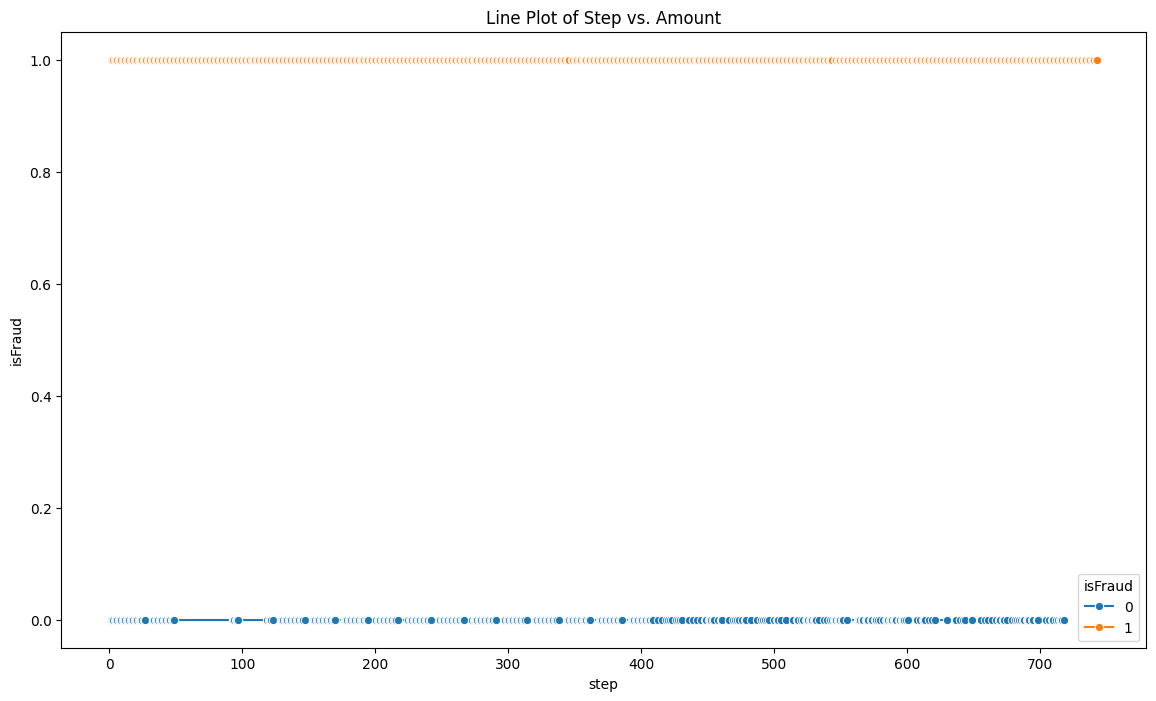

In [33]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df1, x='step', y='isFraud', hue='isFraud', marker='o')
plt.title('Line Plot of Step vs. Amount')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


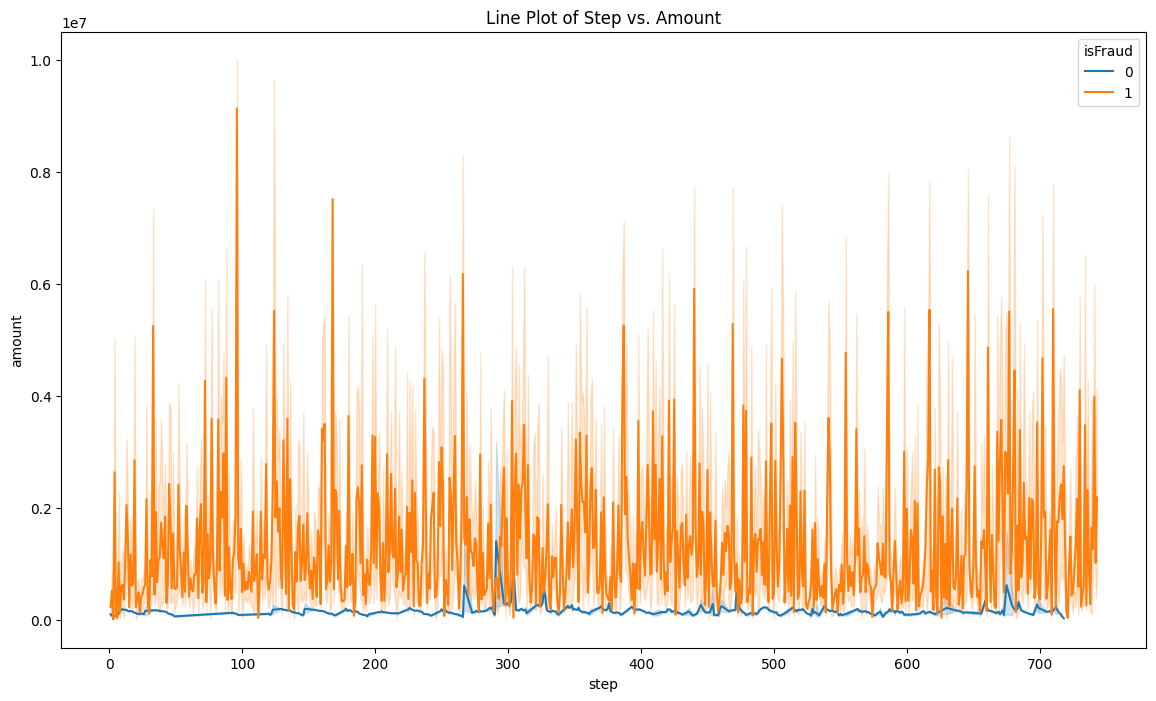

In [34]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df1, x='step', y='amount', hue='isFraud')
plt.title('Line Plot of Step vs. Amount')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


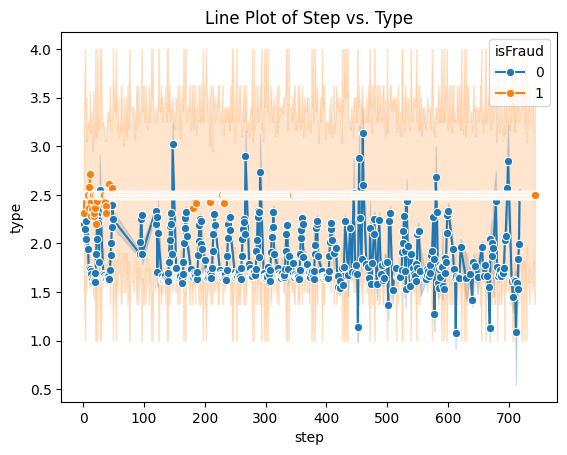

In [35]:
sns.lineplot(data=df1, x='step', y='type', hue='isFraud', marker='o')
plt.title('Line Plot of Step vs. Type')
plt.show()

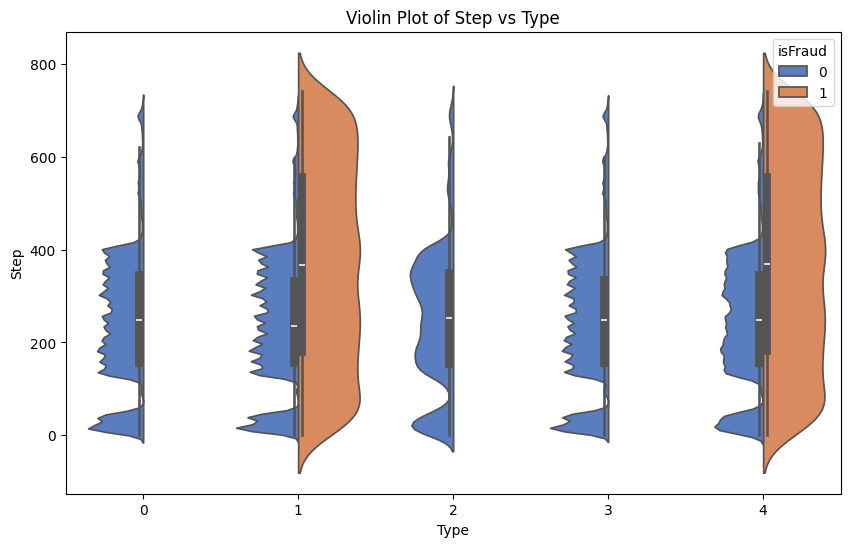

In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df1, x='type', y='step', hue='isFraud', split=True, palette='muted')
plt.title('Violin Plot of Step vs Type')
plt.xlabel('Type')
plt.ylabel('Step')
plt.show()

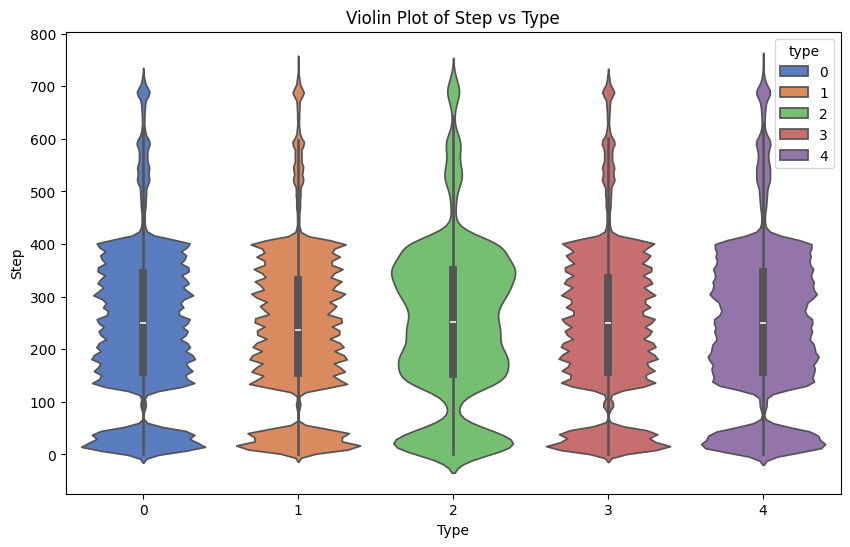

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df1, x='type', y='step', hue='type', palette='muted')
plt.title('Violin Plot of Step vs Type')
plt.xlabel('Type')
plt.ylabel('Step')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [39]:
df_0 = df1[df1.isFraud == 0]
df_1 = df1[df1.isFraud == 1]

df_minority_upsampled = resample(df_1,
                                 replace=True,
                                 n_samples=800000,
                                 random_state=42)

df_majority_downsampled = resample(df_0,
                                   replace=False,
                                   n_samples=2400000,
                                   random_state=42)

df = pd.concat([df_majority_downsampled, df_minority_upsampled])

<ipython-input-42-750ba0742cc6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


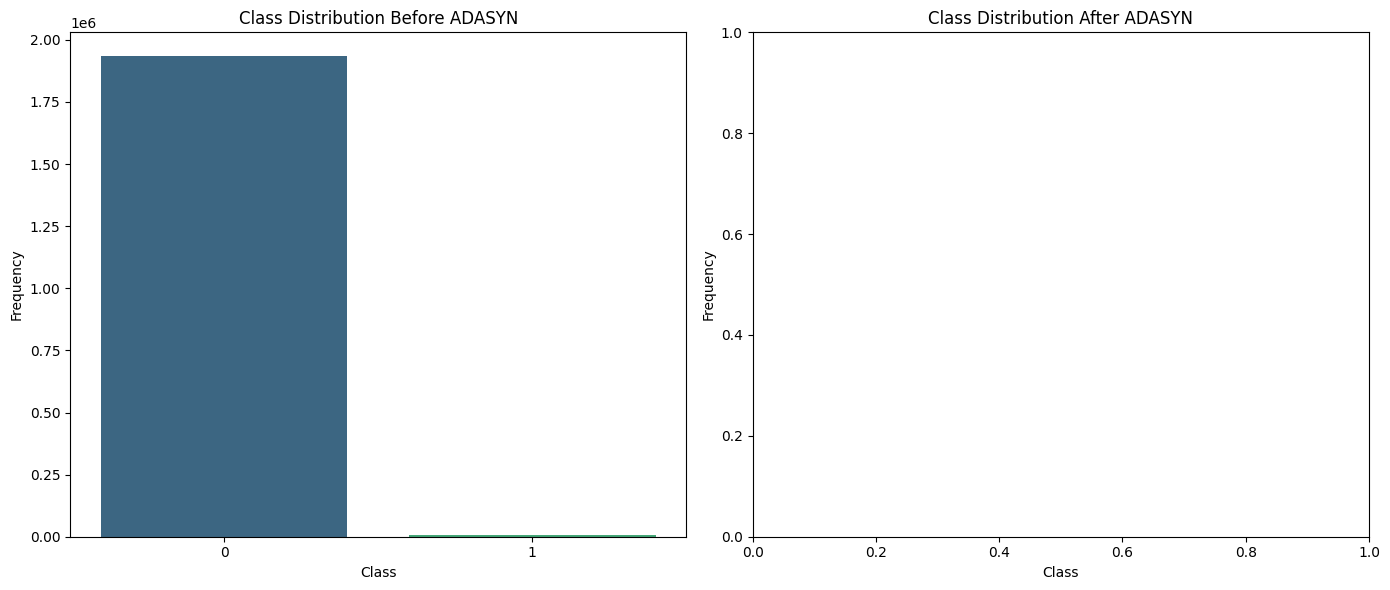

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=y_train, ax=axs[0], palette="viridis")
axs[0].set_title('Class Distribution Before ADASYN')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Frequency')


axs[1].set_title('Class Distribution After ADASYN')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()